In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
# df2 = pd.read_csv("chipVariantCalling/chipVariantCalling_run1.tsv", sep='\t')
df1  = pd.read_csv('chipVariantCalling_run1.tsv', sep='\t')
df2 = pd.read_csv('chipVariantCalling_run2.tsv', sep='\t', low_memory = False)
df2

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
1,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
2,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
3,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
4,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412736,4010290016,433,2,0.0046,0.0047,MODERATE,ZFY,chrY:2848017_G/A,Blank,Blank,NaN,2:2,220:210,1:1,37.0,1.04752,NaN
1412737,4010290016,433,4,0.0092,0.0080,MODERATE,ZFY,chrY:2848021_T/G,Blank,Blank,NaN,2:2,219:208,1:3,24.5,3.15103,NaN
1412738,4010290016,433,4,0.0092,0.0080,MODERATE,ZFY,chrY:2848021_T/G,Blank,Blank,NaN,2:2,219:208,1:3,24.5,3.15103,NaN
1412739,4010290016,433,4,0.0092,0.0080,MODERATE,ZFY,chrY:2848021_T/G,Blank,Blank,NaN,2:2,219:208,1:3,24.5,3.15103,NaN


Drop columns

In [209]:
df2 = df2[(df2.chipOrControl != "Blank") & (df2.chipOrControl != "Unknown")]
df2 = df2.dropna(subset=['chipOrControl'])
df2.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
df2.drop(['sampleTimePt'], axis = 1, inplace=True)

Store names of all genes

In [210]:
genes = df2.SYMBOL.unique()

In [211]:
df2

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Male,2:2,940:982,3:3,35.0,1.044670,CHIP
1,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Male,2:2,940:982,3:3,35.0,1.044670,CHIP
2,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Male,2:2,940:982,3:3,35.0,1.044670,CHIP
3,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Male,2:2,940:982,3:3,35.0,1.044670,CHIP
4,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Male,2:2,940:982,3:3,35.0,1.044670,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693038,4788,14,0.0029,0.0030,MODERATE,BRCC3,chrX:154306976_T/C,Female,2:2,2372:2376,7:7,37.0,1.001683,Control
693039,4788,14,0.0029,0.0030,MODERATE,BRCC3,chrX:154306976_T/C,Female,2:2,2372:2376,7:7,37.0,1.001683,Control
693040,4788,14,0.0029,0.0030,MODERATE,BRCC3,chrX:154306976_T/C,Female,2:2,2372:2376,7:7,37.0,1.001683,Control
693041,4788,14,0.0029,0.0030,MODERATE,BRCC3,chrX:154306976_T/C,Female,2:2,2372:2376,7:7,37.0,1.001683,Control


Separate `loci` into three separate columns: `chromosome` | `chromosome_location` | `nucleotide`

In [212]:
import re

chromosome = []
chromosome_location = []
nucleotide = []

for location_string in df2.loci.array:
    separated = re.split(r"[:_]+", location_string)
    chromosome.append(separated[0])
    chromosome_location.append(separated[1])
    nucleotide.append(separated[2])

In [213]:
df2['chromosome'] = pd.Series(chromosome).values
df2['chromosome_loc'] = pd.Series(chromosome_location).values
df2['nucleotide'] = pd.Series(nucleotide).values

df2.drop(['loci'],axis=1, inplace=True)

Run Nick's code. I believe it changes data types to numerics

In [214]:
objs = {}
lst = []
for i in df2.columns:
    if df2.dtypes[i] == object:
        print(len(df2[f"{i}"].unique()), f"unique values for: {i}")
        if len(df2[f"{i}"].unique()) <= 100:
            objs[i] = len(df2[f"{i}"].unique())
            lst.append(i)

2 unique values for: IMPACT
41 unique values for: SYMBOL
2 unique values for: gender
8 unique values for: BIAS
126964 unique values for: REFBIAS
7134 unique values for: VARBIAS
2 unique values for: chipOrControl
18 unique values for: chromosome
10444 unique values for: chromosome_loc
310 unique values for: nucleotide


In [215]:
for i in lst:
    k = i
    dict = {}
    df2_new = df2
    for ix, i in zip(range(len(df2_new[i].unique())), df2_new[i].unique() ):
        dict[i] = ix
    df2 = df2.replace({f"{k}": dict})
    df2[f"{k}"] = df2[f"{k}"].astype(str).astype(float)

In [216]:
for i in df2.columns:
    if df2.dtypes[i] == float:
        print(len(df2[f"{i}"].unique()), f"unique values for: {i}")

1913 unique values for: AF
1808 unique values for: HIAF
2 unique values for: IMPACT
41 unique values for: SYMBOL
2 unique values for: gender
8 unique values for: BIAS
146 unique values for: QUAL
77561 unique values for: ODDRATIO
2 unique values for: chipOrControl
18 unique values for: chromosome


Columns `BIAS`, `REFBIAS` and `VARBIAS` are strings. Change to floats.

In [217]:
def ratio_to_int(string):
    a, b = string.split(":")
    if int(b) == 0:
        return 0
    else:
        return int(a) / int(b)

In [218]:
refbias = []
varbias = []

for ratio in df2.REFBIAS.array:
    refbias.append(ratio_to_int(ratio)) 

for ratio in df2.VARBIAS.array:
    varbias.append(ratio_to_int(ratio)) 
    
refbias = pd.Series(refbias)
varbias = pd.Series(varbias)

In [219]:
df2['REFBIAS'] = refbias.values
df2['VARBIAS'] = varbias.values

In [220]:
# # Move column positions
# df2 = df2[[c for c in df2 if c not in ['chipOrControl']] + ['chipOrControl']]

In [221]:
df2

,DP,VD,AF,HIAF,IMPACT,SYMBOL,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
0,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.0,0.957230,1.0,35.0,1.044670,0.0,0.0,1747193,A/G
1,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.0,0.957230,1.0,35.0,1.044670,0.0,0.0,1747193,A/G
2,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.0,0.957230,1.0,35.0,1.044670,0.0,0.0,1747193,A/G
3,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.0,0.957230,1.0,35.0,1.044670,0.0,0.0,1747193,A/G
4,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.0,0.957230,1.0,35.0,1.044670,0.0,0.0,1747193,A/G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693038,4788,14,0.0029,0.0030,1.0,31.0,1.0,0.0,0.998316,1.0,37.0,1.001683,1.0,15.0,154306976,T/C
693039,4788,14,0.0029,0.0030,1.0,31.0,1.0,0.0,0.998316,1.0,37.0,1.001683,1.0,15.0,154306976,T/C
693040,4788,14,0.0029,0.0030,1.0,31.0,1.0,0.0,0.998316,1.0,37.0,1.001683,1.0,15.0,154306976,T/C
693041,4788,14,0.0029,0.0030,1.0,31.0,1.0,0.0,0.998316,1.0,37.0,1.001683,1.0,15.0,154306976,T/C


In [222]:
df2_model = df2

In [223]:
df2_model.drop(['chromosome', 'chromosome_loc', 'nucleotide'], axis=1, inplace=True)

### ONE HOT ENCODE "SYMBOL" with pd.get_dummies()

In [224]:
df2_model = pd.concat([df2_model,pd.get_dummies(df2_model['SYMBOL'], prefix='GENE')],axis=1)
df2_model.drop(['SYMBOL'],axis=1, inplace=True)

In [225]:
df2_model

,DP,VD,AF,HIAF,IMPACT,gender,BIAS,REFBIAS,VARBIAS,QUAL,...,GENE_31.0,GENE_32.0,GENE_33.0,GENE_34.0,GENE_35.0,GENE_36.0,GENE_37.0,GENE_38.0,GENE_39.0,GENE_40.0
0,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
1,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
3,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693038,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0
693039,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0
693040,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0
693041,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0


In [226]:
df2_model.columns[12:]

Index(['GENE_0.0', 'GENE_1.0', 'GENE_2.0', 'GENE_3.0', 'GENE_4.0', 'GENE_5.0',
       'GENE_6.0', 'GENE_7.0', 'GENE_8.0', 'GENE_9.0', 'GENE_10.0',
       'GENE_11.0', 'GENE_12.0', 'GENE_13.0', 'GENE_14.0', 'GENE_15.0',
       'GENE_16.0', 'GENE_17.0', 'GENE_18.0', 'GENE_19.0', 'GENE_20.0',
       'GENE_21.0', 'GENE_22.0', 'GENE_23.0', 'GENE_24.0', 'GENE_25.0',
       'GENE_26.0', 'GENE_27.0', 'GENE_28.0', 'GENE_29.0', 'GENE_30.0',
       'GENE_31.0', 'GENE_32.0', 'GENE_33.0', 'GENE_34.0', 'GENE_35.0',
       'GENE_36.0', 'GENE_37.0', 'GENE_38.0', 'GENE_39.0', 'GENE_40.0'],
      dtype='object')

In [227]:
dummy_genes = df2_model.columns[12:]

In [228]:
d = {}

for i in range(len(dummy_genes)):
    d[dummy_genes[i]] = genes[i]

In [229]:
q = df2_model["REFBIAS"].quantile(0.98)
df2_model = df2_model[df2_model["REFBIAS"] < q]

In [230]:
df2_model = df2_model.rename(d, axis=1)  # new method
df2_model.describe()
columns_df2 = df2_model[['DP', 'VD','BIAS','REFBIAS','VARBIAS','QUAL']]
columns_df2

,DP,VD,BIAS,REFBIAS,VARBIAS,QUAL
0,2036,6,0.0,0.957230,1.0,35.0
1,2036,6,0.0,0.957230,1.0,35.0
2,2036,6,0.0,0.957230,1.0,35.0
3,2036,6,0.0,0.957230,1.0,35.0
4,2036,6,0.0,0.957230,1.0,35.0
...,...,...,...,...,...,...
693038,4788,14,0.0,0.998316,1.0,37.0
693039,4788,14,0.0,0.998316,1.0,37.0
693040,4788,14,0.0,0.998316,1.0,37.0
693041,4788,14,0.0,0.998316,1.0,37.0


In [231]:


# DP, VD, BIAS, REFBIAS,VARBIAS,QUAL NORMALIZE


cols_to_norm = ['DP', 'VD','BIAS','REFBIAS','VARBIAS','QUAL']
df2_model[cols_to_norm] = df2_model[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df2_model

,DP,VD,AF,HIAF,IMPACT,gender,BIAS,REFBIAS,VARBIAS,QUAL,...,BRCC3,SRY,ZFY,AMELY,NOTCH1,IDH2,SRSF2,RP11-661A12.9,TLK2,SLC5A10
0,0.009415,0.000058,0.0029,0.0044,0.0,0.0,0.0,0.821216,0.001739,0.862069,...,0,0,0,0,0,0,0,0,0,0
1,0.009415,0.000058,0.0029,0.0044,0.0,0.0,0.0,0.821216,0.001739,0.862069,...,0,0,0,0,0,0,0,0,0,0
2,0.009415,0.000058,0.0029,0.0044,0.0,0.0,0.0,0.821216,0.001739,0.862069,...,0,0,0,0,0,0,0,0,0,0
3,0.009415,0.000058,0.0029,0.0044,0.0,0.0,0.0,0.821216,0.001739,0.862069,...,0,0,0,0,0,0,0,0,0,0
4,0.009415,0.000058,0.0029,0.0044,0.0,0.0,0.0,0.821216,0.001739,0.862069,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693038,0.022154,0.000173,0.0029,0.0030,1.0,1.0,0.0,0.856465,0.001739,1.000000,...,1,0,0,0,0,0,0,0,0,0
693039,0.022154,0.000173,0.0029,0.0030,1.0,1.0,0.0,0.856465,0.001739,1.000000,...,1,0,0,0,0,0,0,0,0,0
693040,0.022154,0.000173,0.0029,0.0030,1.0,1.0,0.0,0.856465,0.001739,1.000000,...,1,0,0,0,0,0,0,0,0,0
693041,0.022154,0.000173,0.0029,0.0030,1.0,1.0,0.0,0.856465,0.001739,1.000000,...,1,0,0,0,0,0,0,0,0,0


In [234]:
# Remove other genes from dataframe
df2_model = df2_model[['DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'gender', 'BIAS', 'REFBIAS',
       'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]

# Create separate dataframe
genes5 = df2_model[['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]

# Sum of one hot encode. Value = 1 if exists, 0 otherwise
p = genes5[list(genes5)].sum(axis=1).array

# Flip values
for i in range(len(p)):
    if p[i] == 0:
        p[i] = 1
    else:
        p[i] = 0
        
# Add to df
df2_model["other"] = p



In [236]:
df2_model.describe()

,DP,VD,AF,HIAF,IMPACT,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
count,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000,632576.000000
mean,0.012236,0.000403,0.010621,0.010472,0.955390,0.497167,0.037346,0.755596,0.002702,0.671616,2.247313,0.479082,0.180404,0.350663,0.114631,0.067189,0.056022,0.231092
std,0.019636,0.006688,0.053320,0.054536,0.206445,0.499992,0.101380,0.216496,0.009139,0.304926,13.708883,0.499563,0.384524,0.477178,0.318577,0.250349,0.229964,0.421531
min,0.000000,0.000000,0.002500,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003111,0.000014,0.002900,0.002900,1.000000,0.000000,0.000000,0.729440,0.000870,0.400000,1.014394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006578,0.000058,0.003800,0.003700,1.000000,0.000000,0.000000,0.841186,0.001739,0.724138,1.085030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.014012,0.000145,0.006300,0.006000,1.000000,1.000000,0.000000,0.880685,0.001739,1.000000,1.616142,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.947031,1.000000,1.000000,3571.428571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forests

In [237]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # import the LogisticRegression model

import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [238]:
from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix

In [239]:
X = df2_model.drop('chipOrControl', axis = 1) # drop the target variable for the features
y = df2_model['chipOrControl'] # create a target dataframe
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=37)
# instantatiate the RFC with 50 ensemble members
clf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values



In [243]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_depth=1, random_state=23).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5376157956305921

In [241]:
# print the accuracy of the RFC
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))
# loop over all the names and feature importance and print both
for name, score in zip(X.columns, clf.feature_importances_):
    print(name,np.round(score,3))

Accuracy 0.975
DP 0.56
VD 0.024
AF 0.019
HIAF 0.012
IMPACT 0.008
gender 0.136
BIAS 0.0
REFBIAS 0.085
VARBIAS 0.003
QUAL 0.01
ODDRATIO 0.031
DNMT3A 0.009
TET2 0.005
TP53 0.029
ASXL1 0.005
BCOR 0.053
other 0.013


# Decision Tree

In [198]:
# Instantatiate the DTC
df2_dtc = DecisionTreeClassifier(random_state = 42, max_depth = 3)
df2_dtc = df2_dtc.fit(X_train, y_train) # training

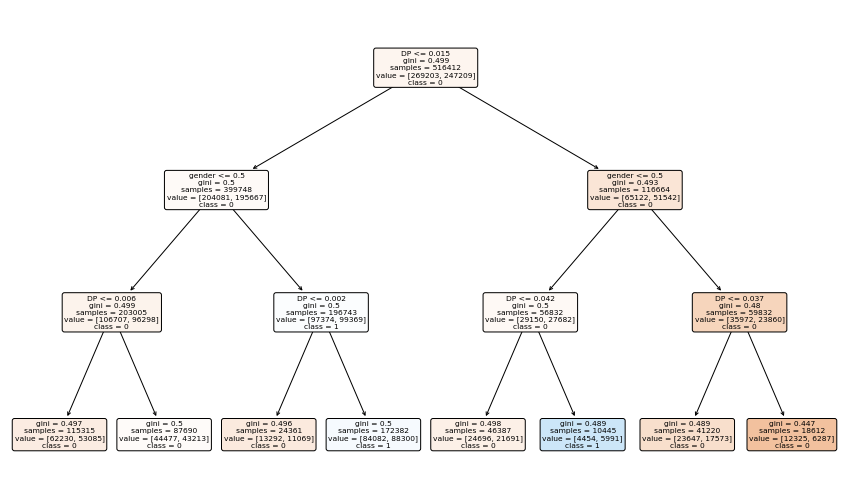

In [199]:
classes = ['0', '1']

fig, ax = plt.subplots(figsize=(15,9)) # initialise the plots and axes
# plot the decision tree for the model df2_dtc
plot_tree(df2_dtc, 
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = classes, # use these names for targets
 feature_names = X.columns # use these names for features
 );

Decision Tree Accuracy: 0.532


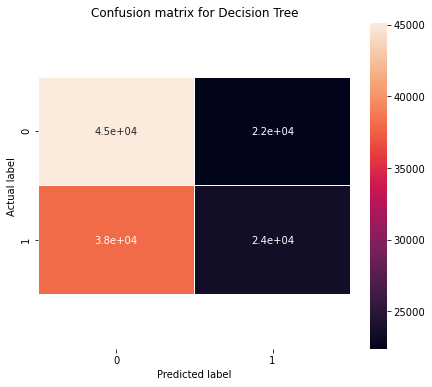

In [200]:
Y_pred = df2_dtc.predict(X_test) # calculate the predictions of the model for our test set
# plot the confusion matrix for the test and predicted target values
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, classes, 'Decision Tree') 
print("Decision Tree Accuracy:",np.round(accuracy_score(y_test, Y_pred),3)) # calculate and print the accuracy score

In [201]:
# Instantatiate the DTC
for i in range(1,8):
    df2_dtc = DecisionTreeClassifier(random_state = 42, max_depth = i)
    df2_dtc = df2_dtc.fit(X_train, y_train) # training
    Y_pred = df2_dtc.predict(X_test) # calculate the predicted values
    accuracy = np.round(accuracy_score(y_test, Y_pred),3) # calculate the accuracy score
    print("Depth, Accuracy = ", f"{i}, {accuracy}")

Depth, Accuracy =  1, 0.523
Depth, Accuracy =  2, 0.526
Depth, Accuracy =  3, 0.532
Depth, Accuracy =  4, 0.54
Depth, Accuracy =  5, 0.541
Depth, Accuracy =  6, 0.547
Depth, Accuracy =  7, 0.554


If depth increases, overfitting will become too overbearing

# Modelling on new dataset

In [180]:
df22 = pd.read_csv("chipVariantCalling/chipVariantCalling_run2.tsv", sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'chipVariantCalling/chipVariantCalling_run2.tsv'

In [ ]:
df22 = df22[(df22.chipOrControl != "Blank") & (df22.chipOrControl != "Unknown")]
df22 = df22.dropna(subset=['chipOrControl'])
df22.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
df22.drop(['sampleTimePt'], axis = 1, inplace=True)
genes = df22.SYMBOL.unique()

In [35]:
objs = {}
lst = []
for i in df22.columns:
    if df22.dtypes[i] == object:
        print(len(df22[f"{i}"].unique()), f"unique values for: {i}")
        if len(df22[f"{i}"].unique()) <= 100:
            objs[i] = len(df22[f"{i}"].unique())
            lst.append(i)

2 unique values for: IMPACT
41 unique values for: SYMBOL
15520 unique values for: loci
2 unique values for: gender
8 unique values for: BIAS
126964 unique values for: REFBIAS
7134 unique values for: VARBIAS
2 unique values for: chipOrControl


In [36]:
for i in lst:
    k = i
    dict = {}
    df22_new = df22
    for ix, i in zip(range(len(df22_new[i].unique())), df22_new[i].unique() ):
        dict[i] = ix
    df22 = df22.replace({f"{k}": dict})
    df22[f"{k}"] = df22[f"{k}"].astype(str).astype(float)

In [37]:
refbias = []
varbias = []

for ratio in df22.REFBIAS.array:
    refbias.append(ratio_to_int(ratio)) 

for ratio in df22.VARBIAS.array:
    varbias.append(ratio_to_int(ratio)) 
    
refbias = pd.Series(refbias)
varbias = pd.Series(varbias)

In [38]:
df22['REFBIAS'] = refbias.values
df22['VARBIAS'] = varbias.values

In [39]:
# ONE HOT ENCODE "SYMBOL" with pd.get_dummies()
df22 = pd.concat([df22,pd.get_dummies(df22['SYMBOL'], prefix='GENE')],axis=1)
df22.drop(['SYMBOL'],axis=1, inplace=True)

In [40]:
df22.drop(['loci'], axis = 1, inplace = True)

In [41]:
df22 = df22.rename(d, axis=1)  # new method

In [42]:
df22

,DP,VD,AF,HIAF,IMPACT,gender,BIAS,REFBIAS,VARBIAS,QUAL,...,AMELY,LY9,SYNE1,AC078842.3,NOTCH1,IDH2,SRSF2,RP11-661A12.9,TLK2,GENE_40.0
0,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
1,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
2,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
3,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
4,2036,6,0.0029,0.0044,0.0,0.0,0.0,0.957230,1.0,35.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693038,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0
693039,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0
693040,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0
693041,4788,14,0.0029,0.0030,1.0,1.0,0.0,0.998316,1.0,37.0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
# X = df22.drop('chipOrControl', axis = 1) # drop the target variable for the features
# y = df22['chipOrControl'] # create a target dataframe
# # split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
# # instantatiate the RFC with 100 ensemble members
# clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
# Y_pred = clf.predict(X_test)  # calculate the predicted values